### Data Preprocessing

In [14]:
import pandas as pd

In [15]:
data_dir = '../../res/ready_to_use'

In [44]:
chicago = pd.read_csv(
    data_dir + '/chicago.csv',
    encoding='unicode_escape')
chicago

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,PRIM_CONTRIBUTORY_CAUSE,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK
0,15,NO CONTROLS,NO CONTROLS,CLEAR,['DARKNESS'],FIXED OBJECT,ALLEY,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,UNABLE TO DETERMINE,W,N,"('N',)",1,0,0,0,2,Tuesday
1,20,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",FIXED OBJECT,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,UNABLE TO DETERMINE,W,N,"('N',)",1,0,0,0,1,Tuesday
2,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,FAILING TO YIELD RIGHT-OF-WAY,W,N,"('N',)",2,0,0,0,0,Tuesday
3,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",SIDESWIPE SAME DIRECTION,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,FAILING TO YIELD RIGHT-OF-WAY,W,N,"('N',)",2,0,0,0,22,Monday
4,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",ANGLE,FOUR WAY,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,UNABLE TO DETERMINE,N,N,"('N',)",2,0,0,0,21,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722462,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,['DAYLIGHT'],TURNING,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",WET,NO DEFECTS,...,UNABLE TO DETERMINE,N,N,"('N',)",2,0,0,0,19,Monday
722463,30,YIELD,NO CONTROLS,CLEAR,['DAYLIGHT'],ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,FAILING TO YIELD RIGHT-OF-WAY,S,N,"('N',)",2,0,0,1,7,Tuesday
722464,30,NO CONTROLS,NO CONTROLS,CLEAR,['DUSK'],PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,UNABLE TO DETERMINE,W,N,"('N',)",2,0,0,0,18,Saturday
722465,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",PEDESTRIAN,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,UNABLE TO DETERMINE,W,N,"('N',)",2,0,0,1,20,Saturday


In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in chicago.columns:
    chicago[column] = label_encoder.fit_transform(chicago[column])
chicago

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,PRIM_CONTRIBUTORY_CAUSE,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK
0,14,4,3,2,1,2,0,5,0,1,...,36,3,0,0,0,0,0,0,2,5
1,17,4,3,2,0,2,8,5,0,1,...,36,3,0,0,0,0,0,0,1,5
2,24,4,3,2,0,2,3,5,0,1,...,18,3,0,0,1,0,0,0,0,5
3,24,4,3,2,0,15,8,5,0,1,...,18,3,0,0,1,0,0,0,22,1
4,29,15,1,2,0,0,6,5,0,1,...,36,1,0,0,1,0,0,0,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722462,24,16,1,7,3,17,8,5,6,1,...,36,1,0,0,1,0,0,0,19,1
722463,24,18,3,2,3,0,2,5,0,1,...,18,2,0,0,1,0,0,1,7,5
722464,24,4,3,2,4,7,3,5,0,1,...,36,3,0,0,1,0,0,0,18,2
722465,24,4,3,2,0,9,8,5,0,1,...,36,3,0,0,1,0,0,1,20,2


In [7]:
x_chicago = chicago.drop(columns=['INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING'])
x_chicago

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK
0,14,4,3,2,1,2,0,5,0,1,0,0,36,3,0,0,0,2,5
1,17,4,3,2,0,2,8,5,0,1,0,0,36,3,0,0,0,1,5
2,24,4,3,2,0,2,3,5,0,1,1,0,18,3,0,0,1,0,5
3,24,4,3,2,0,15,8,5,0,1,0,0,18,3,0,0,1,22,1
4,29,15,1,2,0,0,6,5,0,1,1,0,36,1,0,0,1,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722462,24,16,1,7,3,17,8,5,6,1,0,0,36,1,0,0,1,19,1
722463,24,18,3,2,3,0,2,5,0,1,0,0,18,2,0,0,1,7,5
722464,24,4,3,2,4,7,3,5,0,1,0,0,36,3,0,0,1,18,2
722465,24,4,3,2,0,9,8,5,0,1,1,0,36,3,0,0,1,20,2


In [8]:
y_chicago = chicago[['INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING']]
y_chicago

,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
722462,0,0,0
722463,0,0,1
722464,0,0,0
722465,0,0,1


In [9]:
print(x_chicago.shape)
print(y_chicago.shape)

(722467, 19)
(722467, 3)


### Visualize data

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [36]:
def histogram(df, colname, num_bins=20, figsize=(10, 5)):
  _, ax = plt.subplots(figsize=figsize)
  x_locator = ticker.AutoLocator()
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  ax.xaxis.set_major_locator(x_locator)
  plt.tight_layout()
  plt.show

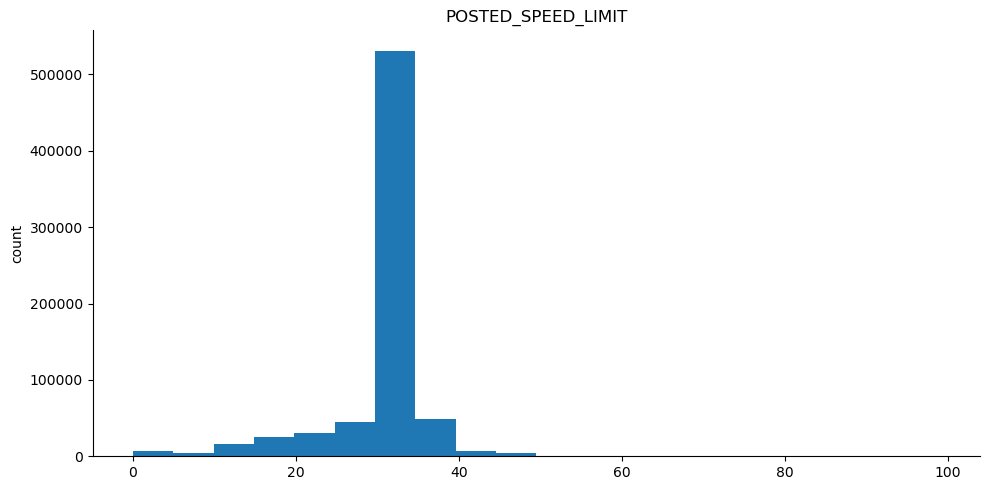

In [45]:
histogram(chicago, *['POSTED_SPEED_LIMIT'], **{})

In [46]:
def categorical_histogram(df, colname, figsize=(10, 5), mpl_palette_name='Dark2'):
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.show()

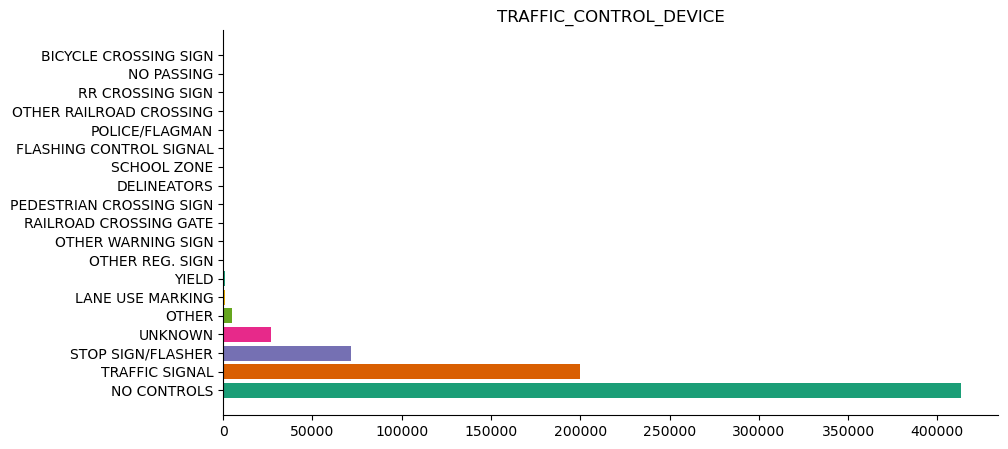

In [48]:
categorical_histogram(chicago, *['TRAFFIC_CONTROL_DEVICE'])

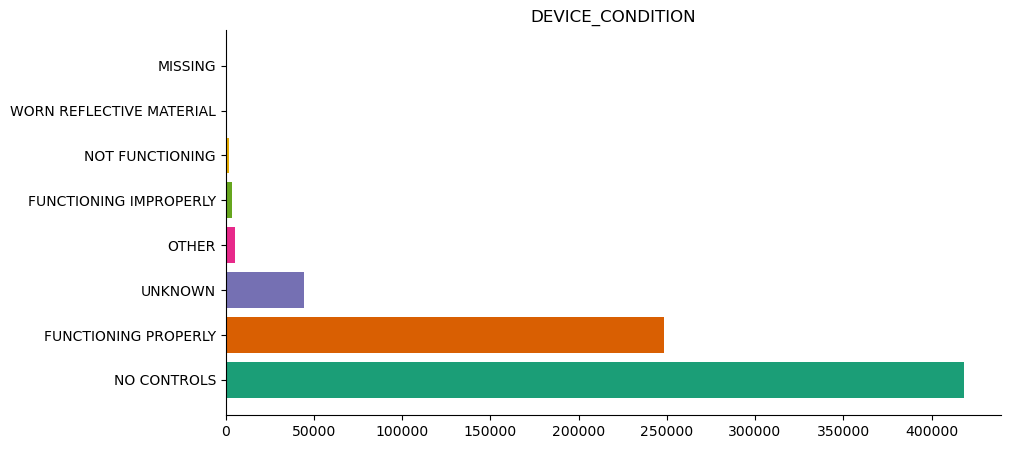

In [50]:
categorical_histogram(chicago, *['DEVICE_CONDITION'])

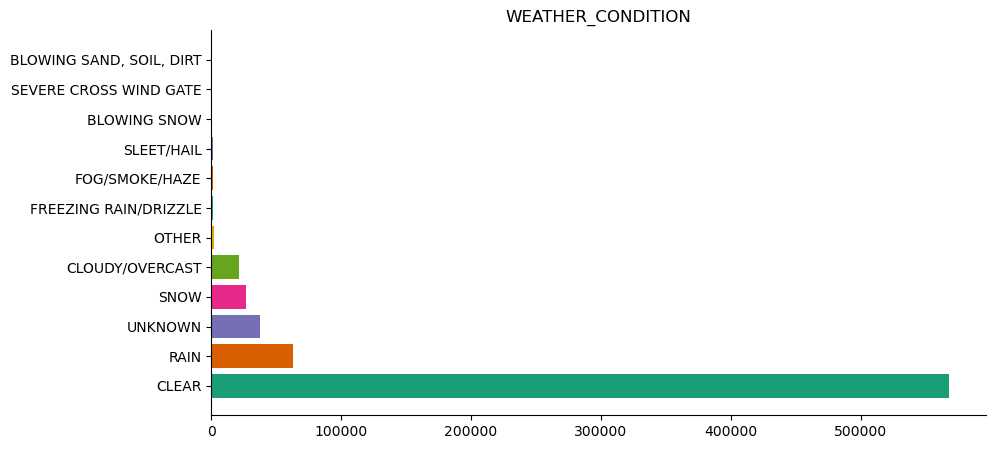

In [51]:
categorical_histogram(chicago, *['WEATHER_CONDITION'])

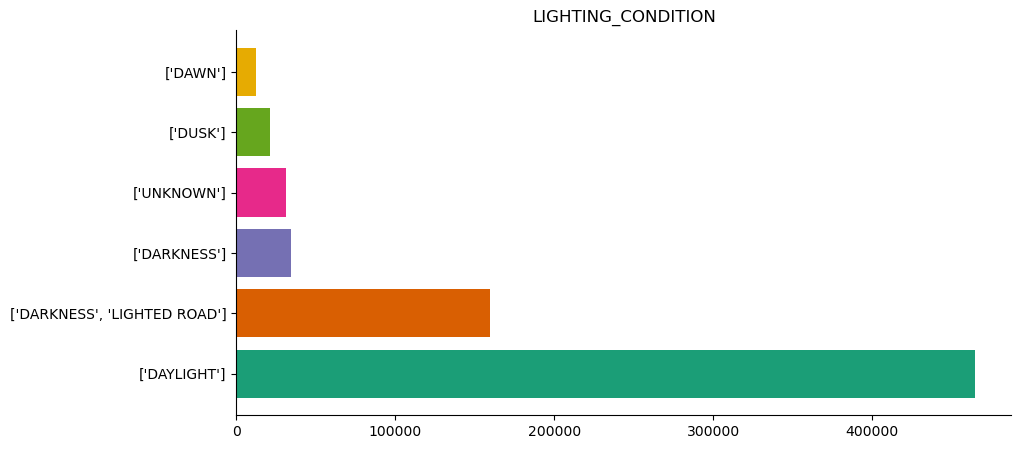

In [52]:
categorical_histogram(chicago, *['LIGHTING_CONDITION'])

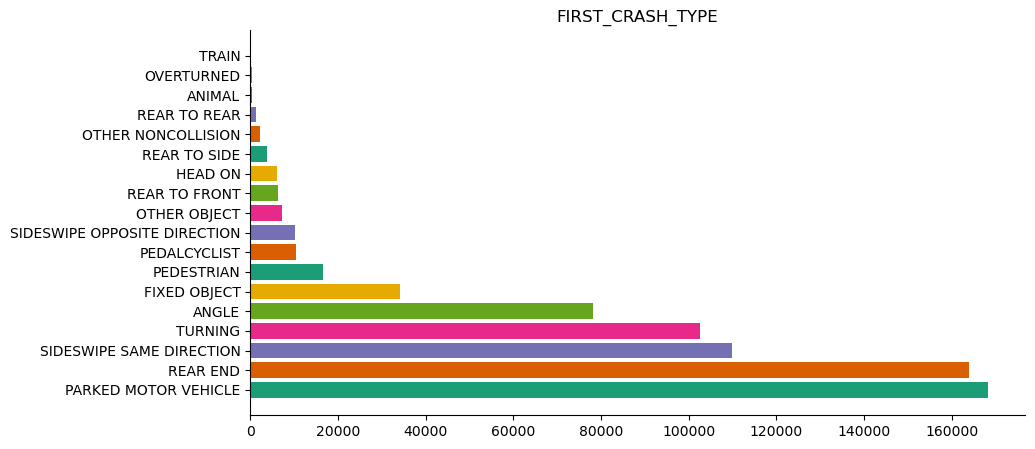

In [53]:
categorical_histogram(chicago, *['FIRST_CRASH_TYPE'])

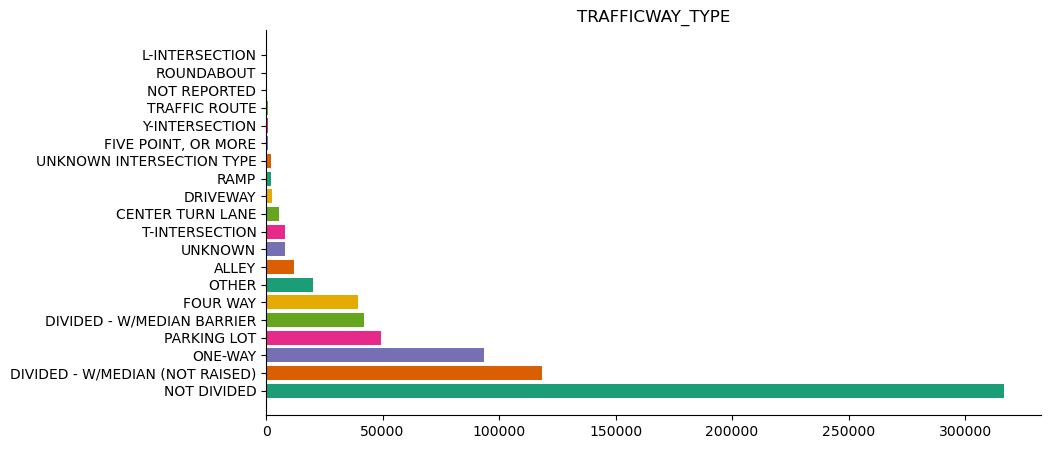

In [54]:
categorical_histogram(chicago, *['TRAFFICWAY_TYPE'])

### Split data

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_chicago.copy(), y_chicago.copy(), test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Apply model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2023-07-13 17:37:45.893322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1280      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9795 (38.26 KB)
Trainable params: 9795 (38.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(x_train, y_train, epochs=4, batch_size=8, verbose=1)

Epoch 1/5
72247/72247 [==============================] - 101s 1ms/step - loss: 0.0656
Epoch 2/5
72247/72247 [==============================] - 100s 1ms/step - loss: 0.0644
Epoch 3/5
72247/72247 [==============================] - 96s 1ms/step - loss: 0.0628
Epoch 4/5
72247/72247 [==============================] - 94s 1ms/step - loss: 0.0625
Epoch 5/5
72247/72247 [==============================] - 89s 1ms/step - loss: 0.0625


In [34]:
import numpy as np
predictions = model.predict(x_test)

# Calculating metrics
mae = np.mean(np.abs(predictions - y_test))
mse = np.mean((predictions - y_test)**2)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

4516/4516 [==============================] - 4s 807us/step
Mean Absolute Error (MAE): 0.07019771524066351
Mean Squared Error (MSE): 0.06011723218797881
Root Mean Squared Error (RMSE): 0.24518815670414998
